In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

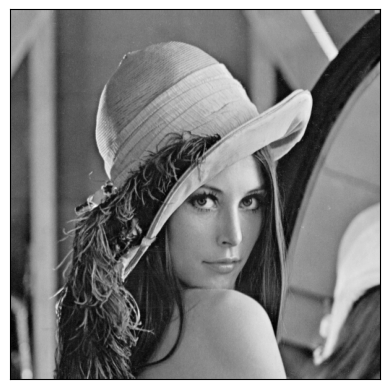

(512, 512)


(array([[67., 67., 87., ...,  0.,  0.,  0.],
        [67., 67., 87., ...,  0.,  0.,  0.],
        [63., 69., 82., ...,  1.,  0.,  0.],
        ...,
        [31., 81., 44., ..., 25., 82.,  0.],
        [30., 86., 37., ..., 26., 82.,  0.],
        [24., 91., 36., ..., 25., 82.,  0.]]),
 array([ 25.,  47.,  69.,  91., 113., 135., 157., 179., 201., 223., 245.]),
 <a list of 512 BarContainer objects>)

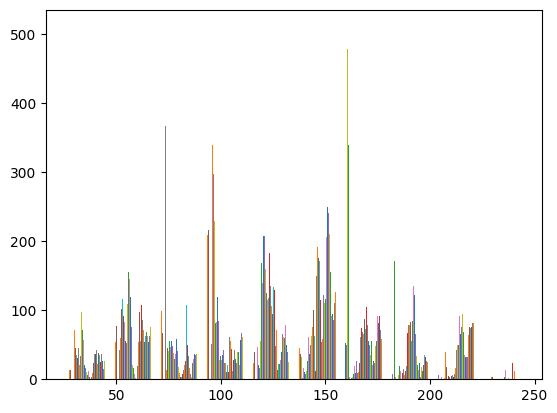

In [18]:
img = cv2.imread('CoverImages/lena.tiff',0)
plt.imshow(img,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()



(512, 512)


(array([[67., 67., 87., ...,  0.,  0.,  0.],
        [67., 67., 87., ...,  0.,  0.,  0.],
        [63., 69., 82., ...,  1.,  0.,  0.],
        ...,
        [31., 81., 44., ..., 25., 82.,  0.],
        [30., 86., 37., ..., 26., 82.,  0.],
        [24., 91., 36., ..., 25., 82.,  0.]]),
 array([ 25.,  47.,  69.,  91., 113., 135., 157., 179., 201., 223., 245.]),
 <a list of 512 BarContainer objects>)

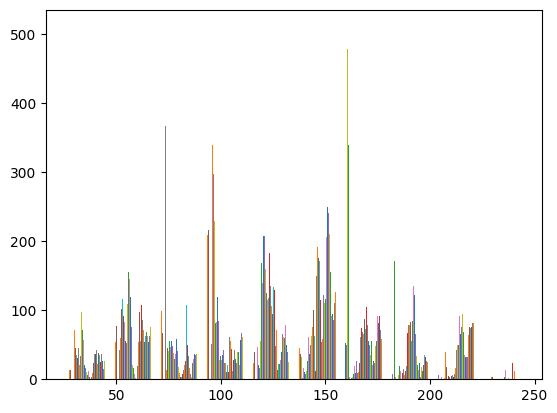

In [22]:
img = cv2.imread('CoverImages/lena.tiff',0)
copyimg=img.copy()
print(img.shape)
rows=img.shape[0]
plt.hist(img)
# rows

calculate the histogram manually

In [19]:
input_hist=np.zeros(256)
hist=np.zeros(256)

for i in range(rows):
    for j in range(rows):
        input_hist[img[i][j]]+=1
total=img.size
# total=36
print(total)
for i in range(0,256):
    hist[i]=input_hist[i]/total
input_hist

262144


array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 6.000e+00, 2.000e+01, 2.900e+01, 5.900e+01,
       9.700e+01, 1.370e+02, 1.810e+02, 2.200e+02, 3.000e+02, 4.210e+02,
       5.000e+02, 6.130e+02, 7.600e+02, 9.400e+02, 1.061e+03, 1.254e+03,
       1.442e+03, 1.647e+03, 1.762e+03, 1.881e+03, 1.998e+03, 2.093e+03,
       2.020e+03, 2.103e+03, 2.086e+03, 2.031e+03, 1.979e+03, 1.807e+03,
       1.732e+03, 1.668e+03, 1.578e+03, 1.469e+03, 1.276e+03, 1.238e+03,
       1.220e+03, 9.990e+02, 9.340e+02, 9.750e+02, 8.810e+02, 8.890e+02,
       7.910e+02, 7.980e+02, 7.710e+02, 7.790e+02, 8.520e+02, 8.200e+02,
       8.310e+02, 7.860e+02, 8.780e+02, 9.090e+02, 8.690e+02, 8.530e+02,
       9.470e+02, 9.720e+02, 9.070e+02, 9.130e+02, 

In [20]:
foreground=[]
background=[]
fg=[]
bg=[]
weighted_variance=np.zeros(256)
for i in range(256):
    fgmean=0
    bgmean=0
    totalfg=0
    totalbg=0
    varfg=0
    varbg=0
    for j in range(0,i):
        foreground.append(input_hist[j])
        fgmean+=(j*input_hist[j])
        totalfg+=input_hist[j]
    for k in range(i,256):
        background.append(input_hist[k])
        bgmean+=(k*input_hist[k])
        totalbg+=input_hist[k]
    if sum(foreground)==0:
        fgmean=0
        bgmean/=sum(background)
    elif sum(background)==0:
        bgmean=0
        fgmean/=sum(foreground)
    else:
        fgmean/=sum(foreground)
        bgmean/=sum(background)
    for j in range(0,i+1):
        varfg+=((j-fgmean)**2)*input_hist[j]
        
    for k in range(i+1,256):
        varbg+=((k-bgmean)**2)*input_hist[k]
    if sum(foreground)==0:
        varfg=0
        varbg/=totalbg
    elif sum(background)==0:
        varbg=0
        varfg/=totalfg
    else:
        varfg/=totalfg
        varbg/=totalbg
    weight_bg=sum(background)/total
    weight_fg=sum(foreground)/total
    weight_var=weight_fg*varfg+weight_bg*varbg
    #Threshold Determination:
    weighted_variance[i]=weight_var
    foreground.clear()
    background.clear()
    
print(weighted_variance)
weighted_variance=list(weighted_variance)
min_var=min(weighted_variance)
thres_index=weighted_variance.index(min_var)
thres_index

[2290.11256954 2290.11256954 2290.11256954 2290.11256954 2290.11256954
 2290.11256954 2290.11256954 2290.11256954 2290.11256954 2290.11256954
 2290.11256954 2290.11256954 2290.11256954 2290.11256954 2290.11256954
 2290.11256954 2290.11256954 2290.11256954 2290.11256954 2290.11256954
 2290.11256954 2290.11256954 2290.11256954 2290.11256954 2290.11256954
 2290.07514499 2289.85512995 2289.13659723 2288.11587809 2286.08207062
 2282.80664018 2278.27462518 2272.4085813  2265.42231998 2256.08882099
 2243.24867327 2228.28223278 2210.27556339 2188.34934366 2161.68510454
 2132.0446231  2097.54125523 2058.38823712 2014.20267619 1967.40259988
 1917.9338159  1865.85633264 1811.73501949 1759.84681552 1706.33513347
 1653.62432835 1602.70379285 1553.5181654  1508.99214808 1466.82223021
 1426.6911884  1389.19396773 1354.75899889 1325.28115569 1297.21017271
 1270.03514627 1248.15285159 1228.15921499 1207.7601752  1189.70971152
 1171.94028566 1156.49363792 1141.32701275 1127.05174744 1113.02456408
 1098.

117

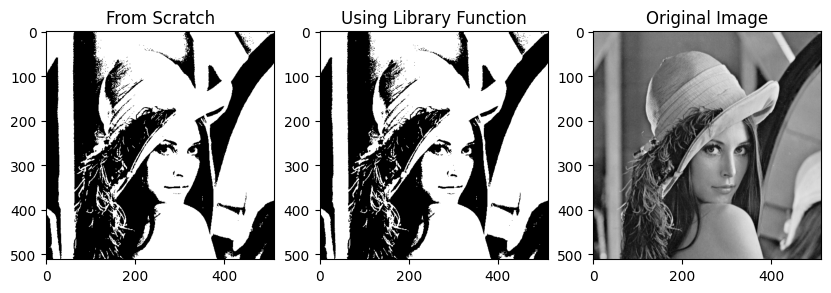

In [21]:
ret,im=cv2.threshold(img,0,255,cv2.THRESH_OTSU)
for i in range(rows):
    for j in range(rows):
        if img[i,j]>=thres_index:
            img[i,j]=255
        else:
            img[i,j]=0
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
plt.title("From Scratch")
plt.imshow(img,'gray')
plt.subplot(2,3,2)
plt.title("Using Library Function")
plt.imshow(im,'gray')
plt.subplot(2,3,3)
plt.title("Original Image")
plt.imshow(copyimg,'gray')
plt.show()